# 202131027_Irham Ahmad Rozan

## Import Library

In [1]:
import cv2 as cv
import numpy as np
from PIL import Image
from rembg import remove
from matplotlib import pyplot as plt

## Read and Show Image

Text(0.5, 1.0, 'Original Image')

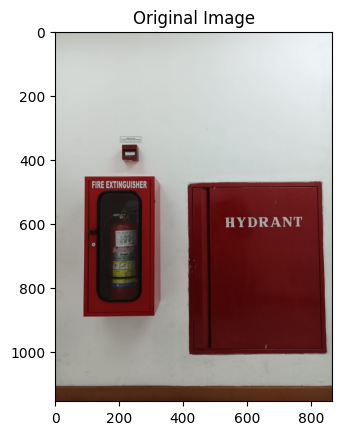

In [2]:
originalImage = cv.imread ("object.jpg")

# Change color originalImage from BGR to RGB
rgbImage = cv.cvtColor(originalImage, cv.COLOR_BGR2RGB)

plt.imshow(rgbImage)
plt.title('Original Image')

## Convert Image to Binary with Thresholding Method

In [3]:
# Change color originalImage from BGR to GRAY
grayImage = cv.cvtColor(originalImage, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(grayImage, 2, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

## Contour from Binary

In [4]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

## Mask

In [5]:
mask = np.zeros(originalImage.shape[:2], np.uint8)

## Contour Image on Mask

In [6]:
cv.drawContours(mask, contours, -1, (255), thickness=cv.FILLED)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Merge the Original Images with Masks Using the Bitwise AND Operator

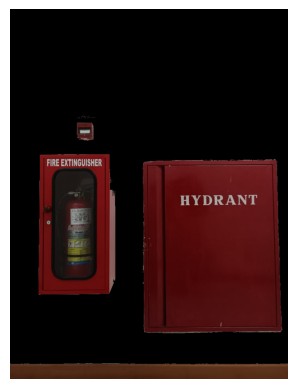

In [7]:
removeImage = cv.bitwise_and(originalImage, originalImage, mask=mask)

# Change color removeImage from BGR to RGB
removeImage = cv.cvtColor(removeImage, cv.COLOR_BGR2RGB)

plt.imshow(removeImage)
plt.axis('off')
plt.show()

## Remove Background

Text(0.5, 1.0, 'Removed Background Image')

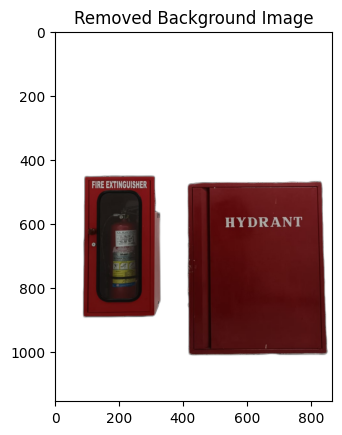

In [8]:
# Process remove background removeImage using rembg library
outputImage = remove(removeImage)

plt.imshow(outputImage)
plt.title('Removed Background Image')

## Showing Original Image and Removed Background Image

Text(0.5, 1.0, 'Removed Background Image')

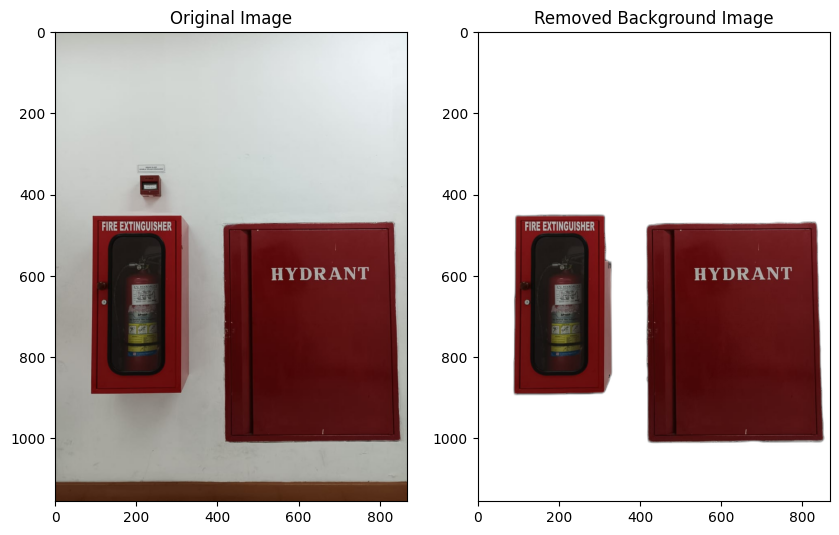

In [9]:
fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(rgbImage)
ax[0].set_title("Original Image")
ax[1].imshow(outputImage)
ax[1].set_title("Removed Background Image")

## Save File Image

In [10]:
# Change color outputImage from BGR to RGB
rgbImage = cv.cvtColor(outputImage, cv.COLOR_BGR2RGB)

# Process remove background rgbImage using rembg library
printImage = remove(rgbImage)

# Save image file with name 'output.png'
cv.imwrite("output.png", printImage)

True